# **Q3. Business Case: Walmart - Confidence Interval and CLT**

## **Problem Statement:**
### Analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import missingno as msno
sns.set_theme(style="darkgrid")
from scipy.stats import t

In [2]:
df = pd.read_csv("walmart_data.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


***
***
## **1. Analyzing Basic Metrics.**

In [4]:
print(df.shape, "\n")
print(df.info())

(550068, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB
None


In [5]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

***
***
## **2. Missing Value & Outlier Detection.**

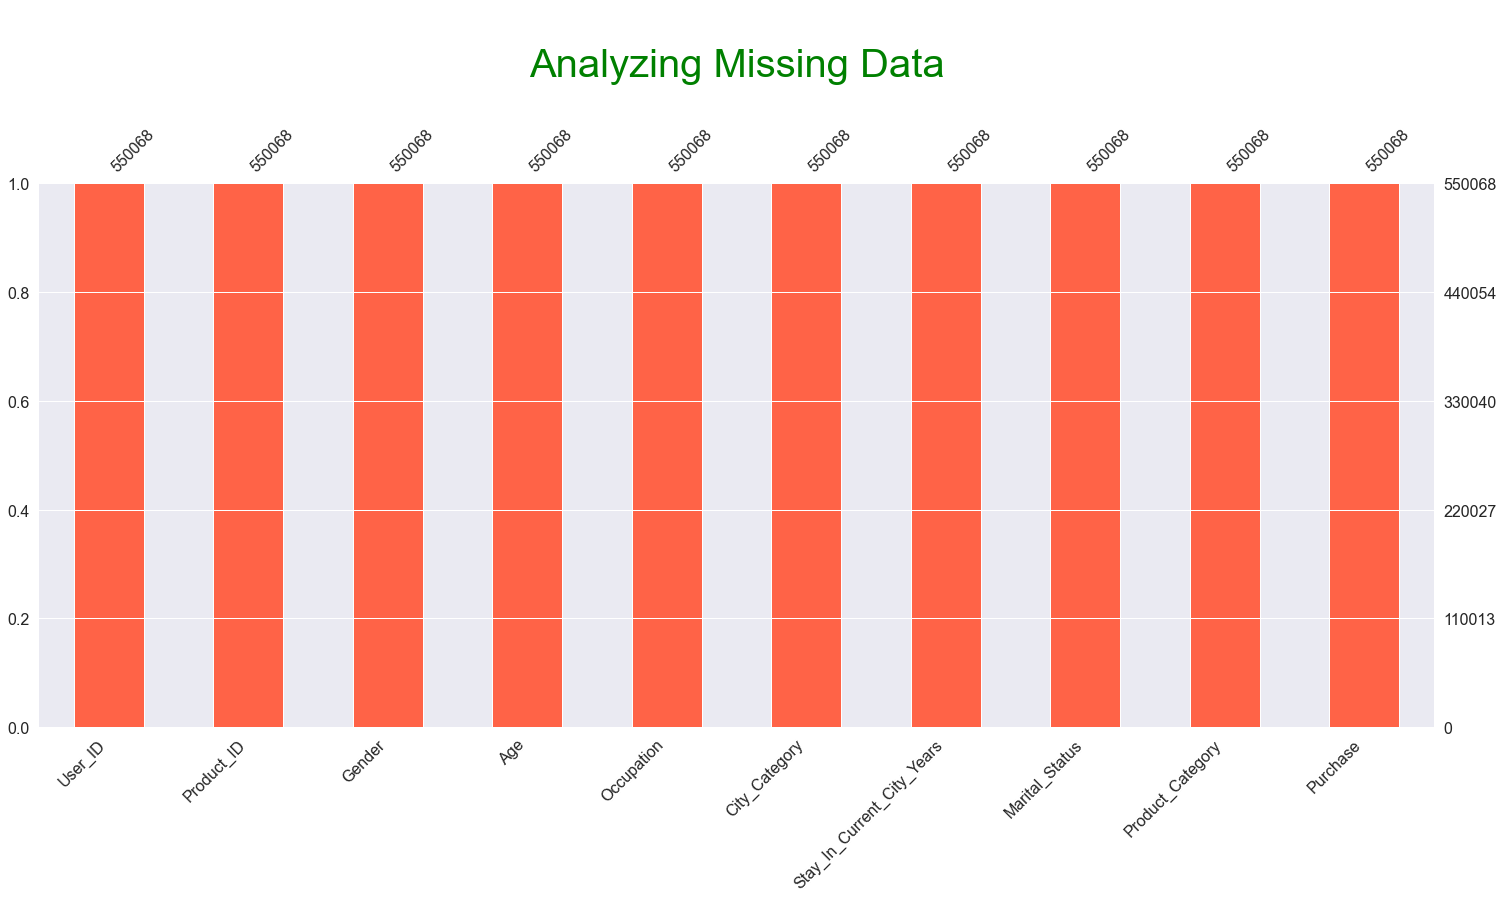

In [6]:
msno.bar(df, color='tomato')
plt.title("\nAnalyzing Missing Data\n", fontsize=40, color="green")
plt.show()

In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [8]:
df.drop(['User_ID','Product_ID'], axis=1, inplace=True)
df['Age']=(df['Age'].str.strip('+'))
df['Stay_In_Current_City_Years']=(df['Stay_In_Current_City_Years'].str.strip('+').astype('float'))

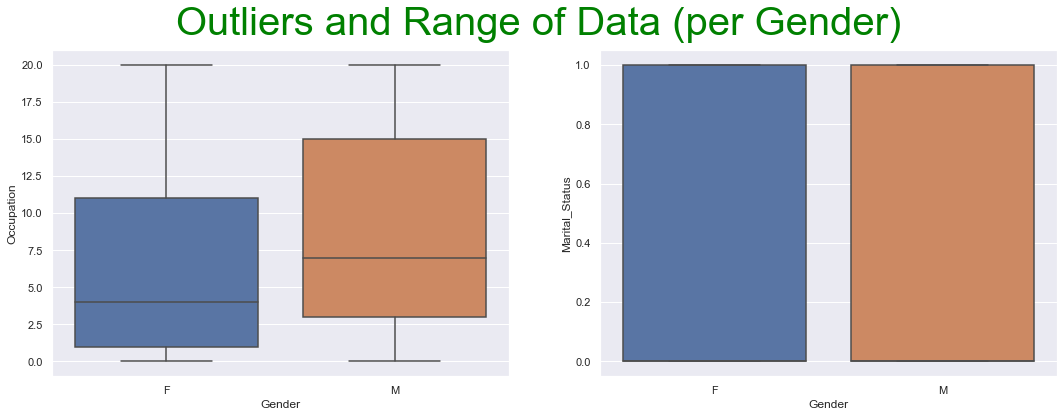

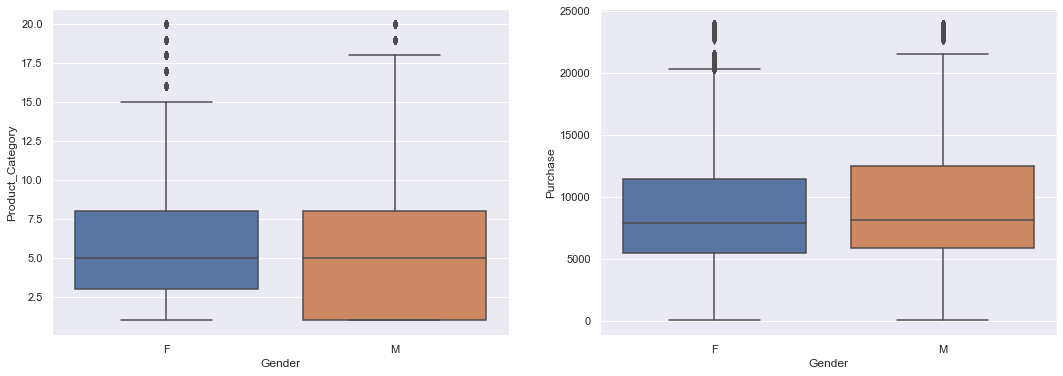

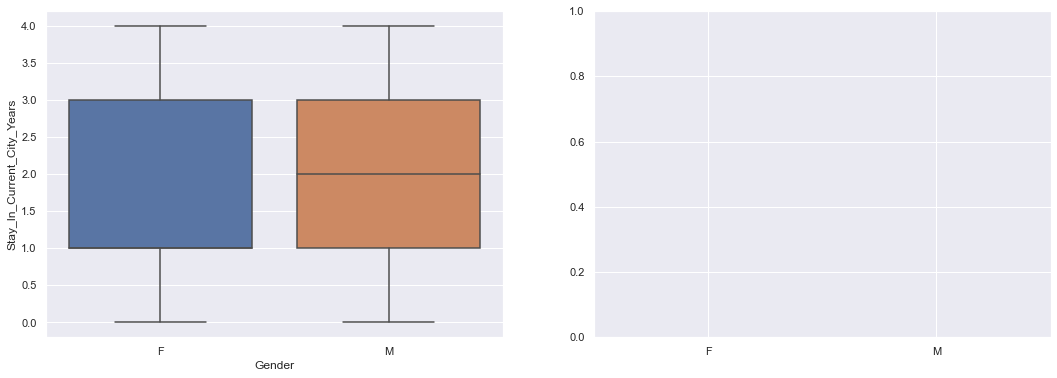

In [9]:
for col, r, c in [['Occupation', 0, 0], ['Marital_Status', 0, 1], ['Product_Category', 1, 0], ['Purchase', 1, 1], ['Stay_In_Current_City_Years', 2, 0]]:
    if c == 0:
        fig, axes = plt.subplots(1, 2, sharex=True, figsize=(18,6))
    sns.boxplot(data=df, y=col, ax=axes[c], x='Gender')
    if c == 1:
        if r == 0:
            fig.suptitle("Outliers and Range of Data (per Gender)", fontsize=40, color="green")
        plt.show()

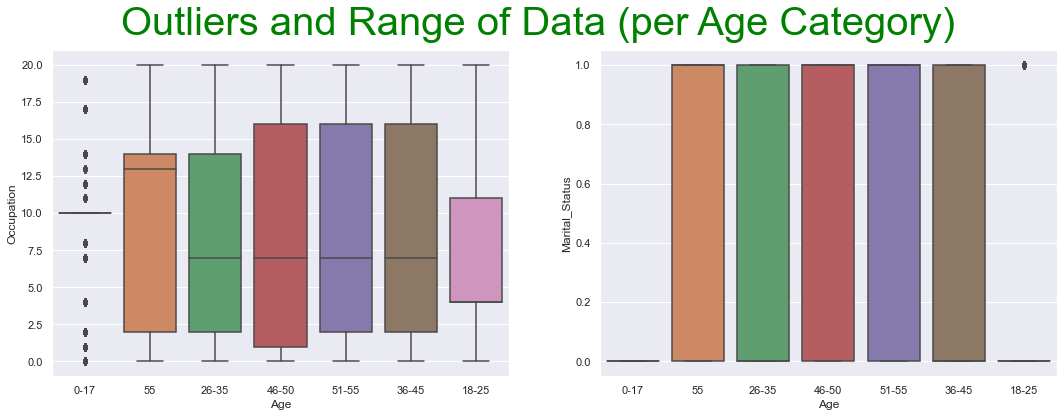

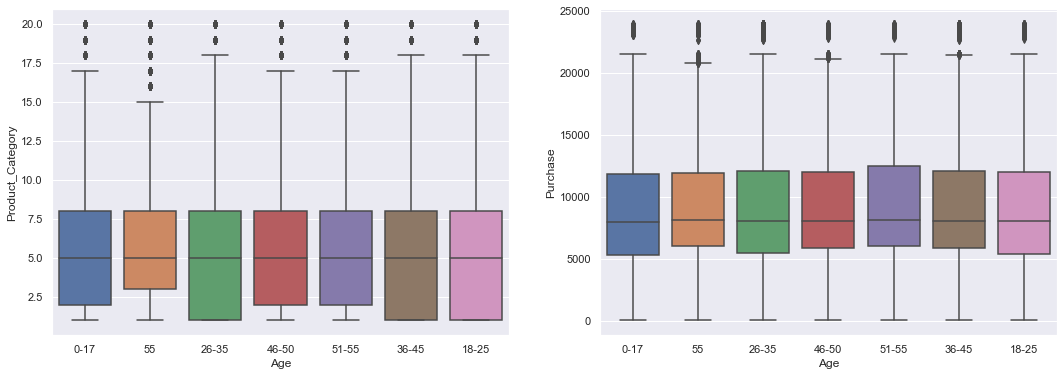

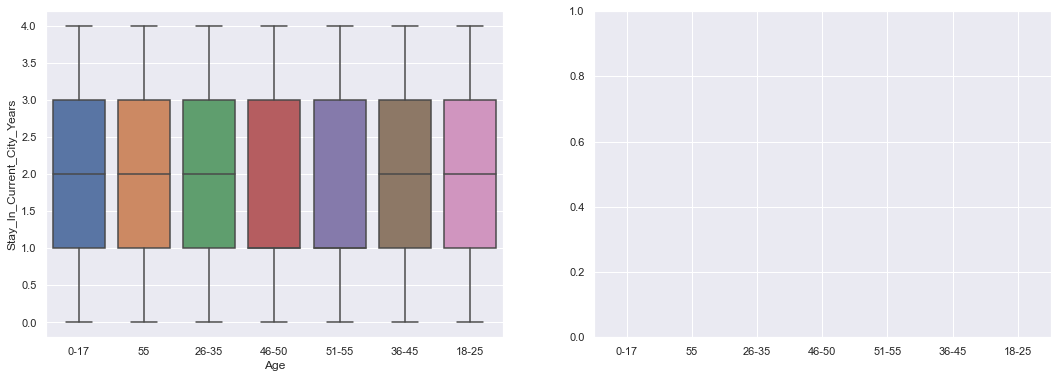

In [10]:
for col, r, c in [['Occupation', 0, 0], ['Marital_Status', 0, 1], ['Product_Category', 1, 0], ['Purchase', 1, 1], ['Stay_In_Current_City_Years', 2, 0]]:
    if c == 0:
        fig, axes = plt.subplots(1, 2, sharex=True, figsize=(18,6))
    sns.boxplot(data=df, y=col, ax=axes[c], x='Age')
    if c == 1:
        if r == 0:
            fig.suptitle("Outliers and Range of Data (per Age Category)", fontsize=40, color="green")
        plt.show()

***
***
## **3. Value Counts and Unique Attributes.**

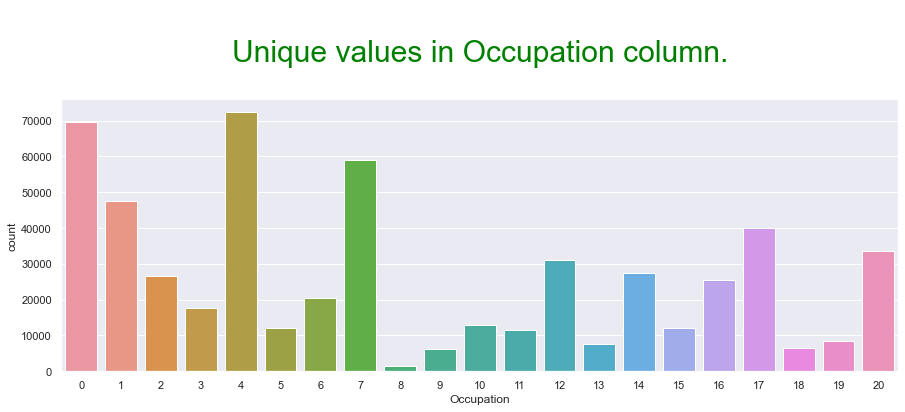

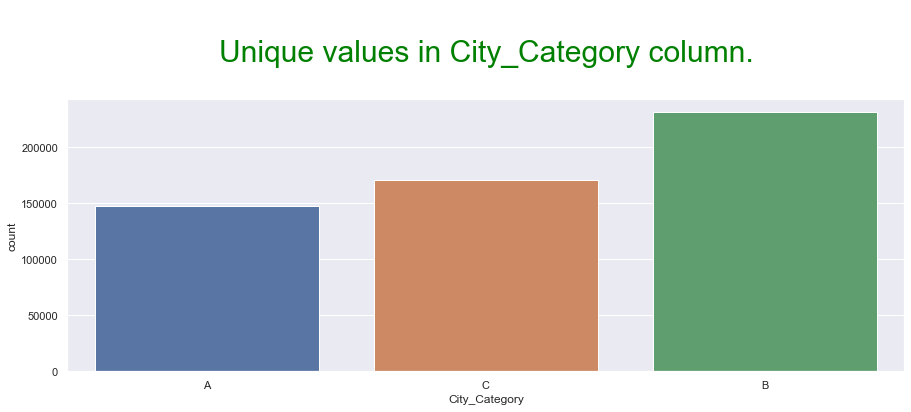

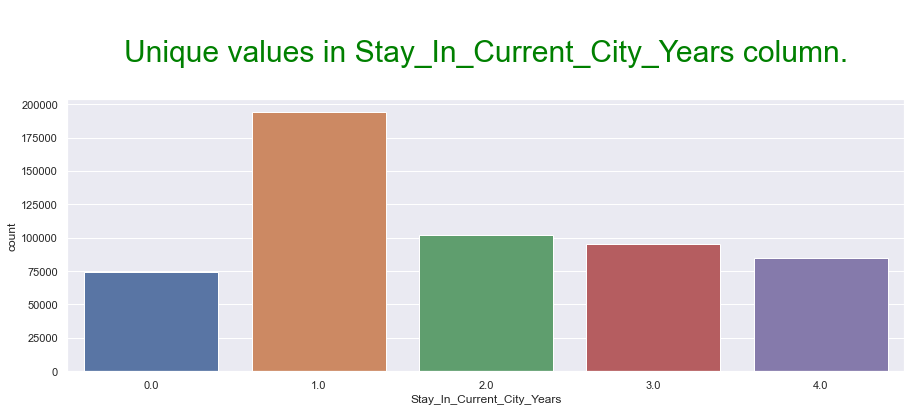

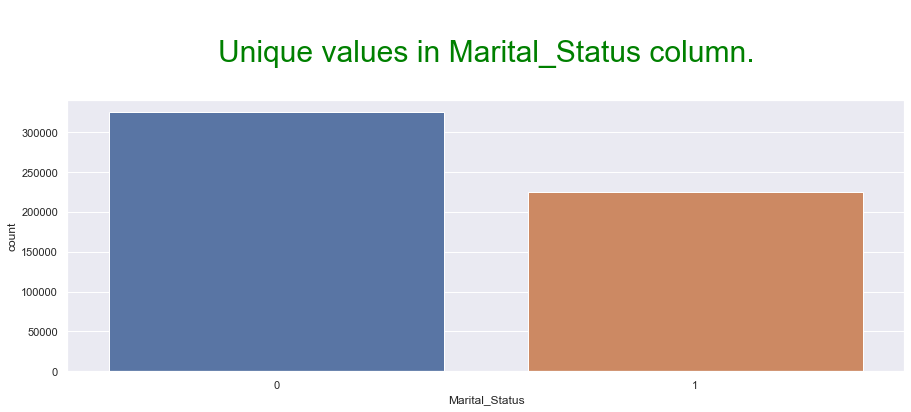

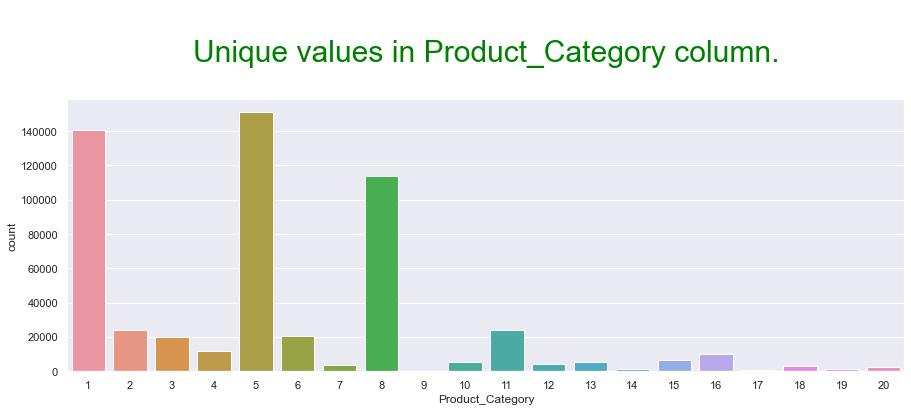

In [11]:
for column in df.columns[2:-1]:
    fig, axes = plt.subplots(figsize=(15,5))
    sns.countplot(data=df, x=column)
    plt.title(f"\nUnique values in {column} column.\n", fontsize=30, color="green")
    plt.show()

***
***
## **4. Business Insights based on Non- Graphical and Visual Analysis.**

In [12]:
df.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years    float64
Marital_Status                  int64
Product_Category                int64
Purchase                        int64
dtype: object

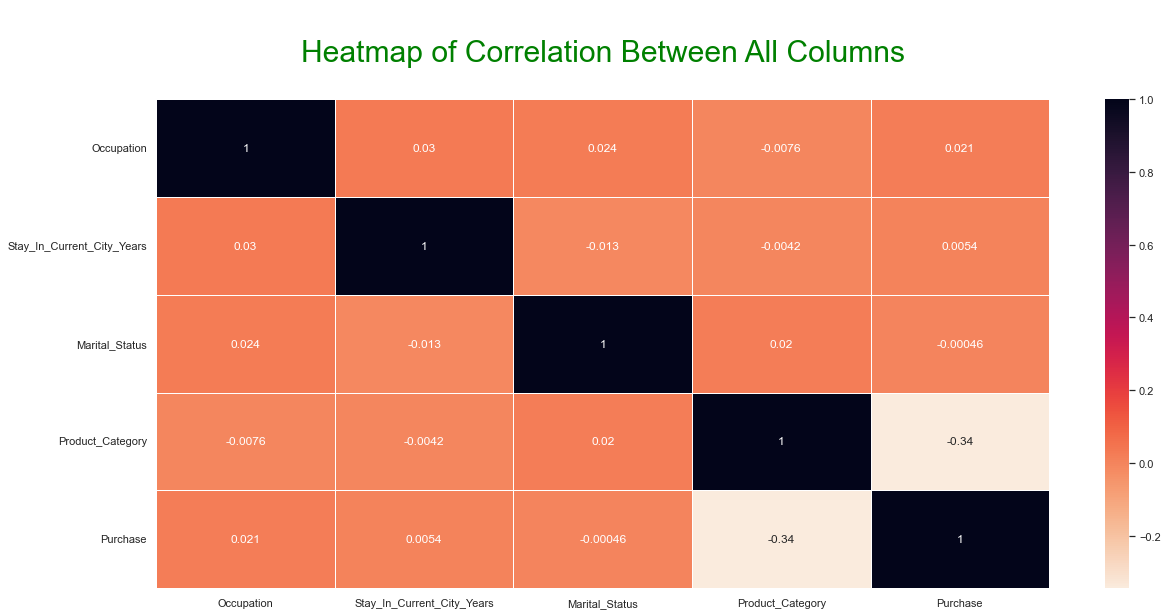

In [13]:
fig, ax = plt.subplots(figsize=(20,9))
sns.heatmap(df.corr(), linewidths=.5, cmap=sns.cm.rocket_r, annot=True, ax=ax)
plt.title("\nHeatmap of Correlation Between All Columns\n", fontsize=30, color="green")
plt.show()

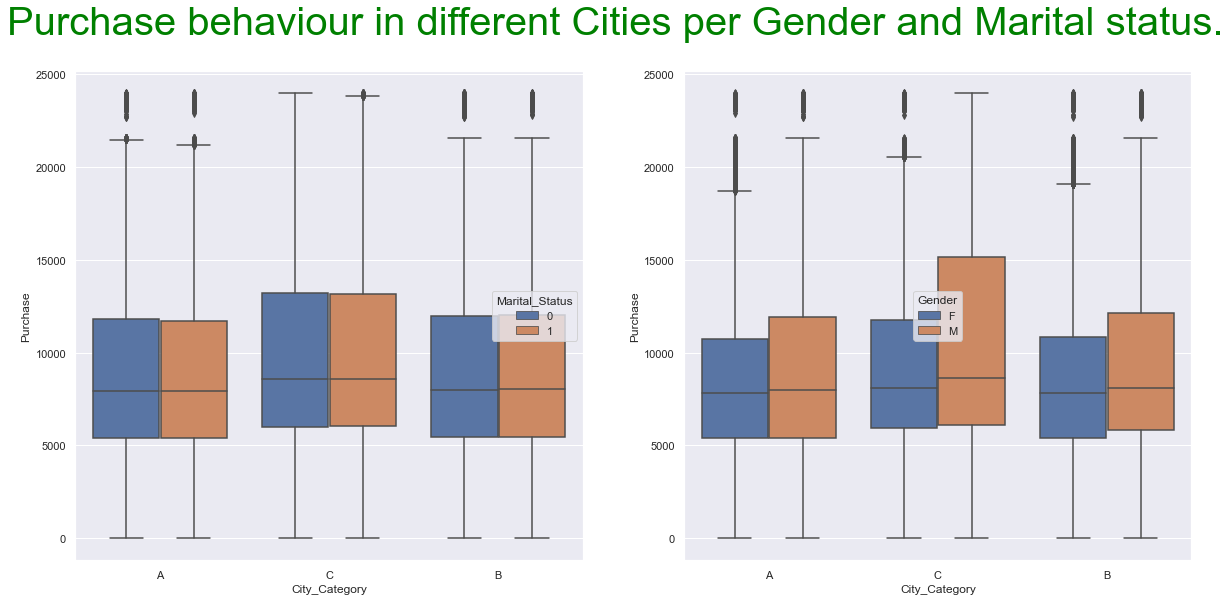

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20,9))
fig.suptitle("Purchase behaviour in different Cities per Gender and Marital status.", fontsize=40, color="green")
sns.boxplot(data=df, y='Purchase', x='City_Category', hue='Marital_Status', ax=ax[0])
sns.boxplot(data=df, y='Purchase', x='City_Category', hue='Gender', ax=ax[1])
plt.show()

<Figure size 1080x576 with 0 Axes>

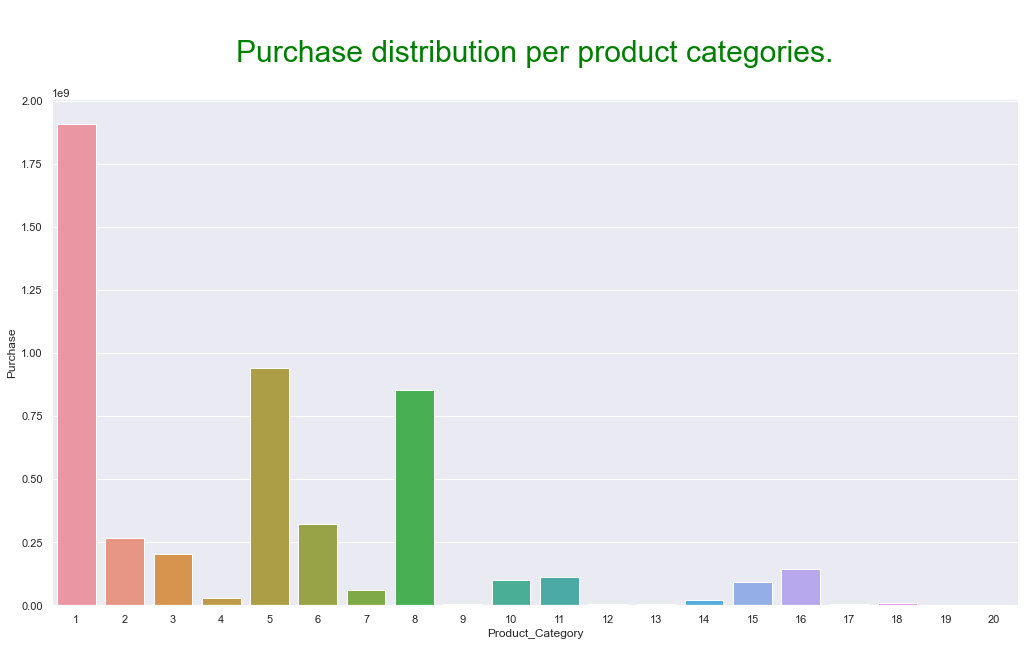

In [15]:
category_purchases = df[['Product_Category', 'Purchase']].groupby('Product_Category')['Purchase'].sum().reset_index()
plt.figure(figsize = (15,8))
sns.catplot(x="Product_Category", y="Purchase", kind="bar", data=category_purchases, height=8, aspect=1.8)
plt.title("\nPurchase distribution per product categories.\n", fontsize=30, color="green")
plt.show()

***
***
## **5. Confidence intervals for Male and Female spendings.**

In [16]:
gendermap = {'M':'Male', 'F':'Female'}
for gender in ['M', 'F']:
    data = df[df.Gender==gender]['Purchase']
    print("\nGender: ", gendermap[gender])
    m = data.mean() 
    s = data.std() 
    dof = len(data)-1
    for confidence in [0.90, 0.95, 0.99]:
        t_crit = np.abs(t.ppf((1-confidence)/2,dof))
        print(f"{confidence*100}% Confidence Interval:", (m-s*t_crit/np.sqrt(len(data)), m+s*t_crit/np.sqrt(len(data))))


Gender:  Male
90.0% Confidence Interval: (9424.512468203842, 9450.539612740688)
95.0% Confidence Interval: (9422.019402055814, 9453.032678888716)
99.0% Confidence Interval: (9417.14682877079, 9457.90525217374)

Gender:  Female
90.0% Confidence Interval: (8713.287689504074, 8755.843840806878)
95.0% Confidence Interval: (8709.21132117373, 8759.92020913722)
99.0% Confidence Interval: (8701.24420611832, 8767.887324192632)


***
***
## **6. Confidence intervals for spendings of Married and Unmarried individuals.**

In [17]:
statusmap = {0:'Unmarried', 1:'Married'}
for status in [0, 1]:
    data = df[df.Marital_Status==status]['Purchase']
    print("\nMarital Status: ", statusmap[status])
    m = data.mean() 
    s = data.std() 
    dof = len(data)-1
    for confidence in [0.90, 0.95, 0.99]:
        t_crit = np.abs(t.ppf((1-confidence)/2,dof))
        print(f"{confidence*100}% Confidence Interval:", (m-s*t_crit/np.sqrt(len(data)), m+s*t_crit/np.sqrt(len(data))))


Marital Status:  Unmarried
90.0% Confidence Interval: (9251.396344426079, 9280.418893416934)
95.0% Confidence Interval: (9248.616353737027, 9283.198884105987)
99.0% Confidence Interval: (9243.182995563593, 9288.63224227942)

Marital Status:  Married
90.0% Confidence Interval: (9243.79064243542, 9278.558505729326)
95.0% Confidence Interval: (9240.460315792989, 9281.888832371758)
99.0% Confidence Interval: (9233.951339733763, 9288.397808430984)


***
***
## **7. Confidence intervals for spendings of different Age groups.**

In [18]:
ages = df['Age'].unique()
for age in ages:
    print("\nAge group: ", age)
    data = Unmarried = df[df.Age==age]['Purchase']
    m = Unmarried.mean() 
    s = Unmarried.std() 
    dof = len(data)-1
    for confidence in [0.90, 0.95, 0.99]:
        t_crit = np.abs(t.ppf((1-confidence)/2,dof))
        print(f"{confidence*100}% Confidence Interval:", (m-s*t_crit/np.sqrt(len(data)), m+s*t_crit/np.sqrt(len(data))))


Age group:  0-17
90.0% Confidence Interval: (8865.049497531349, 9001.8797833586)
95.0% Confidence Interval: (8851.941436361221, 9014.987844528727)
99.0% Confidence Interval: (8826.320033768494, 9040.609247121454)

Age group:  55
90.0% Confidence Interval: (9280.065285868368, 9392.495633030441)
95.0% Confidence Interval: (9269.295063935433, 9403.265854963376)
99.0% Confidence Interval: (9248.243867862855, 9424.317051035954)

Age group:  26-35
90.0% Confidence Interval: (9235.102926382391, 9270.278339357385)
95.0% Confidence Interval: (9231.733560884022, 9273.647704855754)
99.0% Confidence Interval: (9225.148284007466, 9280.23298173231)

Age group:  46-50
90.0% Confidence Interval: (9170.406084331049, 9246.845310605606)
95.0% Confidence Interval: (9163.08393647555, 9254.167458461105)
99.0% Confidence Interval: (9148.772763375606, 9268.478631561049)

Age group:  51-55
90.0% Confidence Interval: (9492.160404787175, 9577.455657133296)
95.0% Confidence Interval: (9483.989875153999, 9585.626

***
***
## **8. Business Insights.**
#### **A.** Male customers are significantly more than Females.
#### **B.** Buyers with age between 26 and 35 are significantly more than any other age category.
#### **C.** There are more buyers in City Category B than the other two City Categories.
#### **D.** Buyers who have spent 1 year in the city are significantly more than the buyers who have spent 2 years, 3 years, more than 4 years and less than 1 year in the city.
#### **E.** Unmarried buyers are more in numbers than the married buyers.
#### **F.** Males in City Category C tend to spend more amount of money than all the other individual buyers.
#### **G.** With 90%, 95% and even 99% of confidence level, we can see that Male buyers spend significantly more money than the Female Buyers, since there is no overlap between confidence interval.
#### **H.** With 90%, 95% and even 99% of confidence level, we can see that Marital Status has no impact on spendings.
#### **I.** With 90%, 95% and even 99% of confidence level, we can see that buyers aged between 0-17, significantly spend less money than the other Buyers, since there is no overlap between confidence interval.
#### **J.** With 90%, 95% and even 99% of confidence level, we can see that buyers aged between 51-55, significantly spend more money than the other Buyers, since there is no overlap between confidence interval.
#### **K.** Products under categories 1, 5 and 8 generate a huge amount of revenue for Walmart.

***
***
## **9. Recommendations.**
#### **A.** Walmart should invest in advertisements for expensive products to target male buyers in city category C.
#### **B.** Walmart should collaborate with celebrities to promote male products.
#### **C.** Walmart should invest in targeted advertisements for individual buyers aged between 51-55.
#### **D.** Walmart should engage in different marketing campaigns to target individual buyers in city category B.
#### **E.** Walmart should invest in ad campaigns to boost sells of products categorized under 1, 5 and 8 product categories.